In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns

# 경고메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [3]:
eco_df = pd.read_excel("fin_dataset_dong3.xlsx")

In [28]:
round(eco_df.describe(),3)

,dong_ID,rank,value,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,...,cc_value,count_zero,count_market,count_bus,count_station,sum_bus,sum_station,sum_waste,y,x
count,8.700000e+01,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,...,87.00,87.000,87.000,87.000,87.000,87.000,8.700000e+01,87.000,87.000,87.000
mean,1.157666e+07,5.046,-10.370,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,...,19.08,0.046,1.460,23.448,0.690,3211789.540,2.184513e+06,4552.879,37.517,127.008
std,1.572255e+05,1.976,109.419,1.006,1.006,1.006,1.006,1.006,1.006,1.006,...,12.87,0.211,1.569,14.094,0.919,1772483.271,3.509719e+06,764.528,0.037,0.110
min,1.123054e+07,1.000,-1001.151,-1.165,-0.830,-1.089,-0.732,-1.376,-0.779,-1.692,...,0.00,0.000,0.000,3.000,0.000,513093.000,0.000000e+00,3237.000,37.457,126.810
25%,1.150060e+07,4.000,-3.210,-0.604,-0.657,-1.089,-0.732,-0.894,-0.407,-0.665,...,9.00,0.000,0.000,14.000,0.000,1772979.000,0.000000e+00,4271.900,37.491,126.896
50%,1.168054e+07,5.000,-0.452,-0.323,-0.311,-0.360,-0.732,-0.073,-0.228,-0.147,...,30.00,0.000,1.000,21.000,0.000,2925135.000,0.000000e+00,4271.900,37.511,127.046
75%,1.171054e+07,6.000,2.145,0.239,0.209,0.733,0.667,0.614,0.092,0.541,...,30.00,0.000,2.000,28.500,1.000,4304383.000,3.143220e+06,4928.800,37.551,127.100
max,1.171072e+07,9.000,116.278,5.575,3.846,2.555,4.864,1.514,6.624,2.690,...,30.00,1.000,7.000,68.000,3.000,7692451.000,1.480765e+07,5556.900,37.594,127.150


In [6]:
eco_df.columns

Index(['gd_nm', 'goo_nm', 'dong_nm', 'dong_ID', 'rank', 'value',
       'count_bicycle', 'count_green', 'count_school', 'count_top',
       'air_value', 'ecocar_ratio', 'one_ratio', 'dong_area', 'cc_value',
       'count_zero', 'count_market', 'count_bus', 'count_station', 'sum_bus',
       'sum_station', 'sum_waste', 'y', 'x'],
      dtype='object')

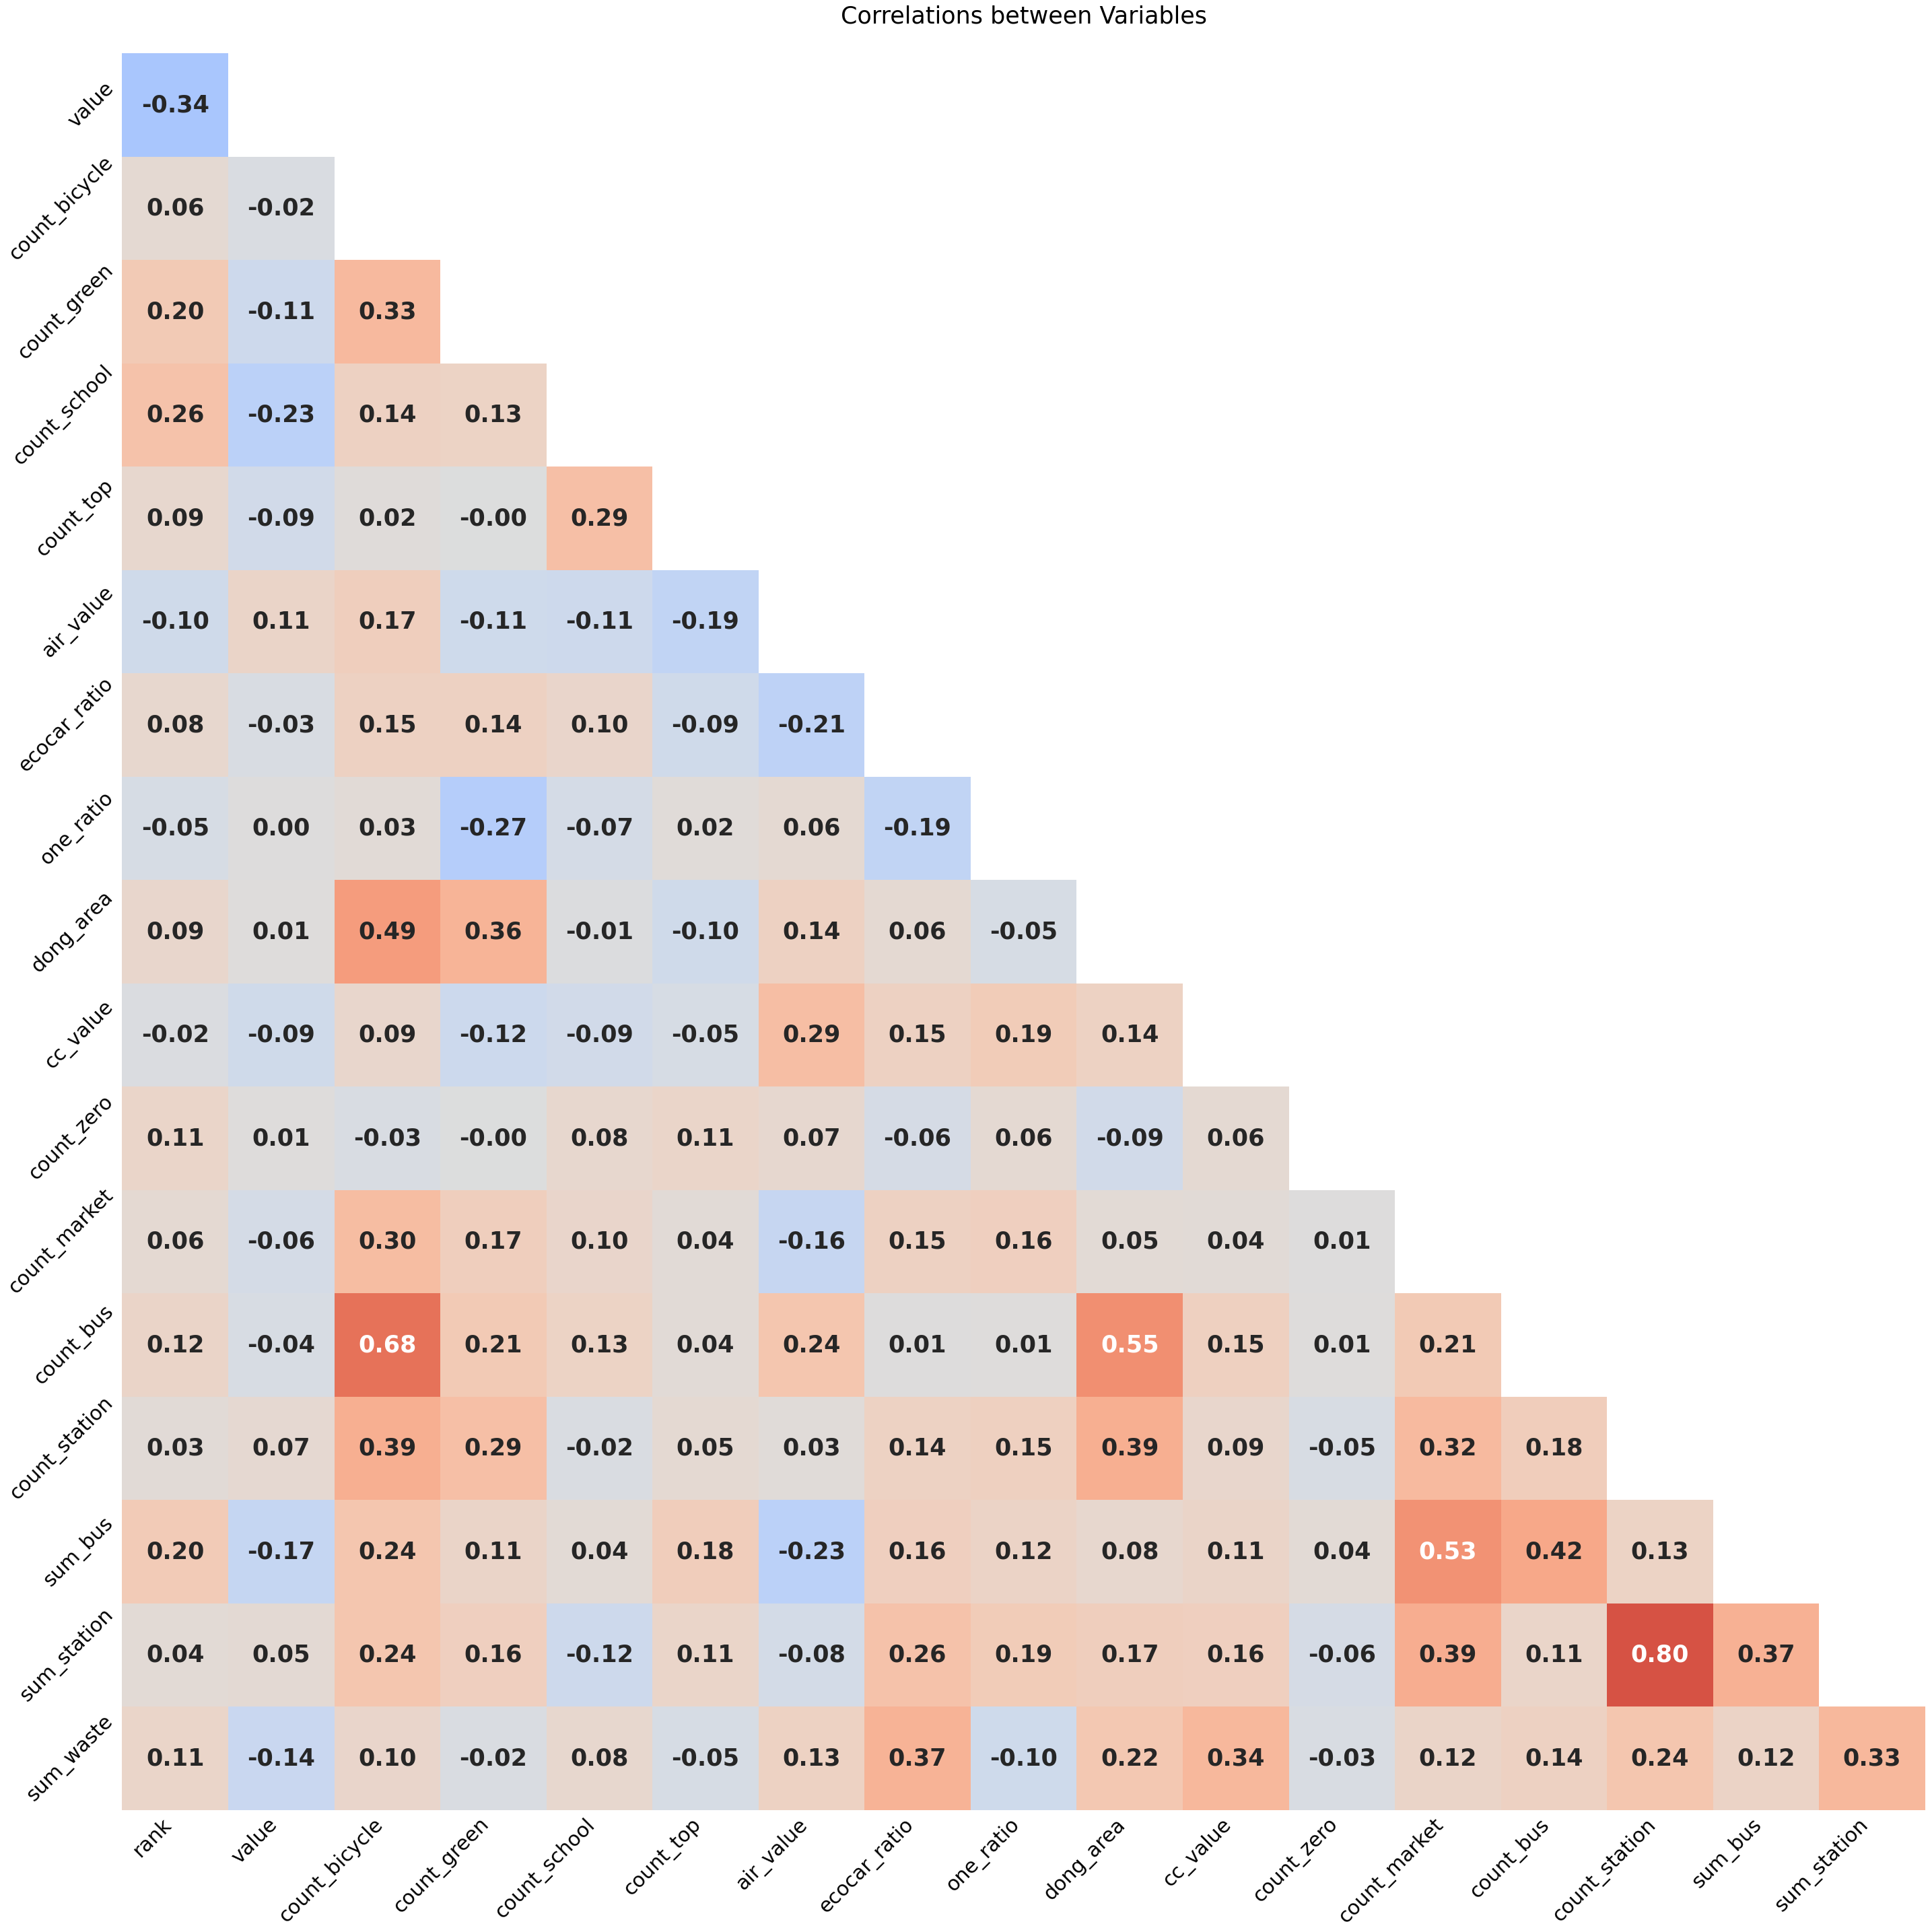

In [8]:
%matplotlib inline
corr=eco_df.drop(columns=['goo_nm', 'dong_nm', 'dong_ID','y', 'x']).corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(48,48))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':35,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=30)
plt.title('Correlations between Variables\n', fontsize=35)
fig.show()

In [9]:
s = corr.unstack()

 # 상관계수의 절댓값 크기순으로 정렬
y = pd.DataFrame(s[s < 1].abs().sort_values(ascending=False), columns=['corr'])  
y = y[y['corr'] >= 0.4]
y.style.background_gradient(cmap='viridis') 

,,corr
count_station,sum_station,0.802604
sum_station,count_station,0.802604
count_bicycle,count_bus,0.677882
count_bus,count_bicycle,0.677882
dong_area,count_bus,0.551442
count_bus,dong_area,0.551442
count_market,sum_bus,0.532101
sum_bus,count_market,0.532101
dong_area,count_bicycle,0.488501
count_bicycle,dong_area,0.488501


## 에코수요등급 확인 = rank

In [23]:
eco_df.set_index("gd_nm",inplace=True)

In [33]:
eco_df[eco_df["sum_station"]==0].count()

goo_nm           48
dong_nm          48
dong_ID          48
rank             48
value            48
count_bicycle    48
count_green      48
count_school     48
count_top        48
air_value        48
ecocar_ratio     48
one_ratio        48
dong_area        48
cc_value         48
count_zero       48
count_market     48
count_bus        48
count_station    48
sum_bus          48
sum_station      48
sum_waste        48
y                48
x                48
dtype: int64

In [24]:
high_eco = eco_df[(eco_df["rank"]==1)|(eco_df["rank"]==2)]
high_eco = high_eco.drop(columns=['goo_nm', 'dong_nm', 'count_bus', 'count_station', 'dong_ID','y', 'x'])

In [25]:
round(high_eco.describe(),4)

,rank,value,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,dong_area,cc_value,count_zero,count_market,sum_bus,sum_station,sum_waste
count,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0,9.0000,9.000000e+00,9.000000e+00,9.0000
mean,1.6667,39.3152,-0.5724,-0.5030,-0.6842,-0.2653,0.3876,-0.4904,-0.1812,0.7644,15.5556,0.0,0.8889,2.062039e+06,3.633404e+05,4322.8667
std,0.5000,42.9534,0.2080,0.6151,0.5295,0.6995,0.9885,0.1678,0.1882,0.3349,14.2400,0.0,1.0541,1.569362e+06,7.308284e+05,566.7690
min,1.0000,8.5637,-0.8845,-0.8302,-1.0892,-0.7316,-1.3763,-0.7042,-0.4443,0.4500,0.0000,0.0,0.0000,9.539500e+05,0.000000e+00,3237.0000
25%,1.0000,10.5412,-0.7441,-0.8302,-1.0892,-0.7316,-0.0730,-0.6250,-0.3390,0.5300,0.0000,0.0,0.0000,1.188135e+06,0.000000e+00,4271.9000
50%,2.0000,20.5517,-0.6036,-0.6570,-1.0892,-0.7316,-0.0730,-0.4807,-0.1356,0.5800,10.0000,0.0,1.0000,1.410871e+06,0.000000e+00,4271.9000
75%,2.0000,37.2620,-0.3228,-0.6570,-0.3603,-0.0322,1.5140,-0.4119,-0.0449,1.0700,30.0000,0.0,1.0000,2.151979e+06,0.000000e+00,4928.8000
max,2.0000,116.2778,-0.3228,1.0750,0.3686,1.3668,1.5140,-0.2081,0.1119,1.3700,30.0000,0.0,3.0000,5.946183e+06,1.874164e+06,4928.8000


In [26]:
high_eco[["rank","dong_area","cc_value","count_zero","count_market","sum_bus","sum_station","sum_waste"]]

,rank,dong_area,cc_value,count_zero,count_market,sum_bus,sum_station,sum_waste
gd_nm,,,,,,,,
강서구 화곡8동,1,0.53,30,0,0,2835570,0,4928.8
송파구 풍납1동,1,1.37,0,0,0,1185664,0,4271.9
강서구 화곡2동,1,0.45,30,0,0,1616393,0,4928.8
동대문구 장안1동,2,0.69,10,0,1,5946183,0,3237.0
송파구 마천1동,2,0.53,10,0,1,1188135,1395900,4271.9
송파구 마천2동,2,0.58,0,0,1,2151979,0,4271.9
강서구 화곡3동,2,0.53,30,0,2,1410871,0,4928.8
송파구 거여1동,2,1.13,30,0,0,953950,1874164,4271.9
금천구 시흥3동,2,1.07,0,0,3,1269610,0,3794.8


87개 기준으로 본거임 -> 제로 없음

In [29]:
high_eco = eco_df[(eco_df["rank"]==1)|(eco_df["rank"]==2)|(eco_df["rank"]==3)]
high_eco = high_eco.drop(columns=['goo_nm', 'dong_nm', 'count_bus', 'count_station', 'dong_ID','y', 'x'])
round(high_eco.describe(),4)

,rank,value,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,dong_area,cc_value,count_zero,count_market,sum_bus,sum_station,sum_waste
count,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0,20.0000,2.000000e+01,2.000000e+01,20.0000
mean,2.4000,19.9382,-0.3088,-0.1980,-0.4332,-0.0322,0.2630,-0.1302,-0.0423,1.1735,17.2000,0.0,1.0500,2.707903e+06,1.189566e+06,4346.8150
std,0.7539,33.1831,0.6694,1.0088,0.8158,1.0400,1.0560,1.1762,0.5391,1.2930,13.4931,0.0,1.6376,1.544894e+06,2.750227e+06,721.9441
min,1.0000,2.5256,-0.8845,-0.8302,-1.0892,-0.7316,-1.3763,-0.7042,-0.8637,0.4500,0.0000,0.0,0.0000,9.539500e+05,0.000000e+00,3237.0000
25%,2.0000,3.6175,-0.6036,-0.8302,-1.0892,-0.7316,-0.2782,-0.5469,-0.4254,0.5675,0.0000,0.0,0.0000,1.375556e+06,0.000000e+00,3794.8000
50%,3.0000,6.3887,-0.6036,-0.6570,-0.3603,-0.7316,0.2707,-0.3885,-0.1667,0.8400,22.0000,0.0,1.0000,2.374468e+06,0.000000e+00,4271.9000
75%,3.0000,13.4949,-0.3228,-0.3106,-0.3603,0.1427,1.5140,-0.2642,0.1778,1.1425,30.0000,0.0,1.0000,4.009850e+06,3.489750e+05,4928.8000
max,3.0000,116.2778,2.0643,2.9802,1.8265,2.7658,1.5140,4.7728,1.1732,6.4100,30.0000,0.0,7.0000,5.946183e+06,1.100770e+07,5556.9000


In [30]:
high_eco[["rank","dong_area","cc_value","count_zero","count_market","sum_bus","sum_station","sum_waste"]]

,rank,dong_area,cc_value,count_zero,count_market,sum_bus,sum_station,sum_waste
gd_nm,,,,,,,,
강서구 화곡8동,1,0.53,30,0,0,2835570,0,4928.8
송파구 풍납1동,1,1.37,0,0,0,1185664,0,4271.9
강서구 화곡2동,1,0.45,30,0,0,1616393,0,4928.8
동대문구 장안1동,2,0.69,10,0,1,5946183,0,3237.0
송파구 마천1동,2,0.53,10,0,1,1188135,1395900,4271.9
송파구 마천2동,2,0.58,0,0,1,2151979,0,4271.9
강서구 화곡3동,2,0.53,30,0,2,1410871,0,4928.8
송파구 거여1동,2,1.13,30,0,0,953950,1874164,4271.9
금천구 시흥3동,2,1.07,0,0,3,1269610,0,3794.8


In [31]:
round(eco_df[["rank","dong_area","cc_value","count_zero","count_market","sum_bus","sum_station","sum_waste"]].describe(),3)

,rank,dong_area,cc_value,count_zero,count_market,sum_bus,sum_station,sum_waste
count,87.000,87.000,87.00,87.000,87.000,87.000,8.700000e+01,87.000
mean,5.046,1.522,19.08,0.046,1.460,3211789.540,2.184513e+06,4552.879
std,1.976,1.468,12.87,0.211,1.569,1772483.271,3.509719e+06,764.528
min,1.000,0.450,0.00,0.000,0.000,513093.000,0.000000e+00,3237.000
25%,4.000,0.795,9.00,0.000,0.000,1772979.000,0.000000e+00,4271.900
50%,5.000,1.130,30.00,0.000,1.000,2925135.000,0.000000e+00,4271.900
75%,6.000,1.630,30.00,0.000,2.000,4304383.000,3.143220e+06,4928.800
max,9.000,10.870,30.00,1.000,7.000,7692451.000,1.480765e+07,5556.900


In [35]:
eco_df[["rank","dong_area","cc_value","count_zero","count_market","sum_bus","sum_station","sum_waste"]].head(50)

,rank,dong_area,cc_value,count_zero,count_market,sum_bus,sum_station,sum_waste
gd_nm,,,,,,,,
강서구 화곡8동,1,0.53,30,0,0,2835570,0,4928.8
송파구 풍납1동,1,1.37,0,0,0,1185664,0,4271.9
강서구 화곡2동,1,0.45,30,0,0,1616393,0,4928.8
동대문구 장안1동,2,0.69,10,0,1,5946183,0,3237.0
송파구 마천1동,2,0.53,10,0,1,1188135,1395900,4271.9
송파구 마천2동,2,0.58,0,0,1,2151979,0,4271.9
강서구 화곡3동,2,0.53,30,0,2,1410871,0,4928.8
송파구 거여1동,2,1.13,30,0,0,953950,1874164,4271.9
금천구 시흥3동,2,1.07,0,0,3,1269610,0,3794.8
